In [29]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [30]:
x = torch.from_numpy(np.arange(1, 7, 1).reshape(3, 2))
x

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [31]:
intermed = torch.matmul(x.T,x)
intermed

tensor([[35, 44],
        [44, 56]])

In [32]:
torch.matmul(intermed, x.T)

tensor([[123, 281, 439],
        [156, 356, 556]])

In [33]:
time = np.arange(20)
speed = np.arange(20) + 5
model = np.poly1d(np.polyfit(time, speed, 2))
model


poly1d([1.04225642e-16, 1.00000000e+00, 5.00000000e+00])

# Autograd Quadratic

tensor(16., dtype=torch.float64)
tensor(9.6388, dtype=torch.float64)
tensor(9.0380, dtype=torch.float64)
tensor(7.5312, dtype=torch.float64)
tensor(7.5333, dtype=torch.float64)
tensor(7.4993, dtype=torch.float64)
tensor(7.4700, dtype=torch.float64)
tensor(7.4600, dtype=torch.float64)
tensor(7.4480, dtype=torch.float64)
tensor(7.4357, dtype=torch.float64)
tensor(7.4232, dtype=torch.float64)
tensor(7.4103, dtype=torch.float64)
tensor(7.3970, dtype=torch.float64)
tensor(7.3834, dtype=torch.float64)
tensor(7.3696, dtype=torch.float64)
tensor(7.3557, dtype=torch.float64)
tensor(7.3415, dtype=torch.float64)
tensor(7.3273, dtype=torch.float64)
tensor(7.3130, dtype=torch.float64)
tensor(7.2986, dtype=torch.float64)
tensor(7.2842, dtype=torch.float64)
tensor(7.2698, dtype=torch.float64)
tensor(7.2555, dtype=torch.float64)
tensor(7.2412, dtype=torch.float64)
tensor(7.2269, dtype=torch.float64)
tensor(7.2127, dtype=torch.float64)
tensor(7.1986, dtype=torch.float64)
tensor(7.1846, dtype=torch.floa

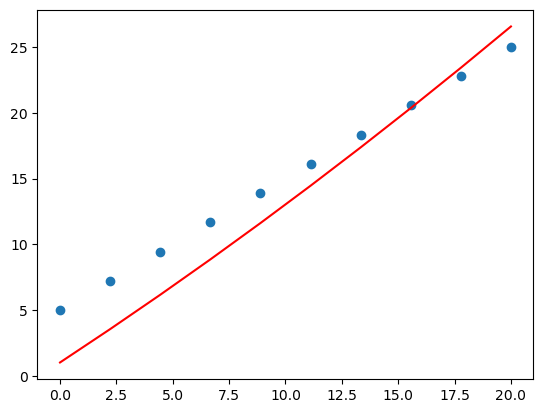

In [34]:
class QuadraticModel:
    def __init__(self, a=0, b=0, c=0):
        self.a = torch.Tensor([a])
        self.b = torch.Tensor([b])
        self.c = torch.Tensor([c])
        self.a.requires_grad = True
        self.b.requires_grad = True
        self.c.requires_grad = True
        self.params = [self.a, self.b, self.c]
        self.momentum = [torch.zeros_like(param) for param in self.params]
        self.out = None
        self.loss = None
    
    def compute(self, time, speed):
        self.out = self.a * time ** 2 + self.b * time + self.c
        self.loss = torch.mean((self.out - speed) ** 2)
        self.loss.backward()
    
    def step(self, lr):
        with torch.no_grad():
            self.a -= lr * self.a.grad
            self.b -= lr * self.b.grad
            self.c -= lr * self.c.grad
            for momentum, param in zip(self.momentum, self.params):
                momentum *= 0.9
                momentum += param.grad
                param -= lr * momentum
            for param in self.params:
                param.grad.zero_()

n = 10
time = torch.from_numpy(np.linspace(0, 20, n)) # x
speed = torch.from_numpy(np.linspace(5, 25, n)) # y = 0x^2 + 1x + 5
model = QuadraticModel(a=0, b=1, c=1)
lr = 1e-5
for i in range(1000):
    model.compute(time, speed)
    print(model.loss.data)
    # print("a=", model.a.data, "b=", model.b.data, "c=", model.c.data)
    model.step(lr)
    lr *= 0.99

print("a=", model.a.data, "b=", model.b.data, "c=", model.c.data)
plt.plot(time.numpy(), speed.numpy(), 'o')
plt.plot(time.numpy(), model.out.data.numpy(), 'r-')

tensor(454389.6662, dtype=torch.float64)
tensor(232367.6859, dtype=torch.float64)
tensor(97543.1539, dtype=torch.float64)
tensor(43898.7114, dtype=torch.float64)
tensor(53064.2448, dtype=torch.float64)
tensor(92882.7582, dtype=torch.float64)
tensor(129384.1538, dtype=torch.float64)
tensor(143519.8402, dtype=torch.float64)
tensor(133963.1867, dtype=torch.float64)
tensor(109180.9796, dtype=torch.float64)
tensor(80024.8123, dtype=torch.float64)
tensor(55692.4120, dtype=torch.float64)
tensor(41837.1307, dtype=torch.float64)
tensor(39839.3128, dtype=torch.float64)
tensor(47078.3532, dtype=torch.float64)
tensor(58328.0880, dtype=torch.float64)
tensor(67978.6521, dtype=torch.float64)
tensor(72145.5731, dtype=torch.float64)
tensor(69718.3328, dtype=torch.float64)
tensor(62131.3054, dtype=torch.float64)
tensor(52318.5244, dtype=torch.float64)
tensor(43452.6580, dtype=torch.float64)
tensor(37882.9423, dtype=torch.float64)
tensor(36499.0928, dtype=torch.float64)
tensor(38635.2208, dtype=torch.flo

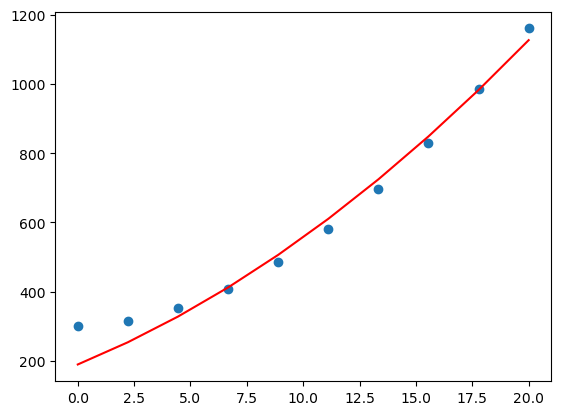

In [73]:

class PolyModelOptim:
    def __init__(self, a=0, b=0, c=0):
        self.a = torch.Tensor([a])
        self.b = torch.Tensor([b])
        self.c = torch.Tensor([c])
        self.a.requires_grad = True
        self.b.requires_grad = True
        self.c.requires_grad = True
        self.params = [self.a, self.b, self.c]
        self.out = None
        self.loss = None
    
    def compute(self, time, speed):
        self.out = self.a * time ** 2 + self.b * time + self.c
        self.loss = torch.mean((self.out - speed) ** 2)
    
    def step(self, optimizer):
        optimizer.zero_grad()
        self.loss.backward()
        optimizer.step()

model = PolyModelOptim(a=0, b=0, c=0)
optimizer = torch.optim.Adam(model.params, lr=1)
n = 10
time = torch.from_numpy(np.linspace(0, 20, n)) # x
speed = 2*time**2 + 3*time + 300

for i in range(500):
    model.compute(time, speed)
    model.step(optimizer)
    print(model.loss.data)

print("a=", model.a.data, "b=", model.b.data, "c=", model.c.data)
plt.plot(time.numpy(), speed.numpy(), 'o')
plt.plot(time.numpy(), model.out.data.numpy(), 'r-')

tensor(683401., dtype=torch.float64)
tensor(176393.8277, dtype=torch.float64)
tensor(88127.8117, dtype=torch.float64)
tensor(171815.8747, dtype=torch.float64)
tensor(196919.1226, dtype=torch.float64)
tensor(146207.3158, dtype=torch.float64)
tensor(94404.1362, dtype=torch.float64)
tensor(78512.3908, dtype=torch.float64)
tensor(84152.2842, dtype=torch.float64)
tensor(88342.2490, dtype=torch.float64)
tensor(84677.2004, dtype=torch.float64)
tensor(78621.6110, dtype=torch.float64)
tensor(75180.7058, dtype=torch.float64)
tensor(74490.9249, dtype=torch.float64)
tensor(74428.2374, dtype=torch.float64)
tensor(73709.2700, dtype=torch.float64)
tensor(72463.7324, dtype=torch.float64)
tensor(71267.9212, dtype=torch.float64)
tensor(70370.8419, dtype=torch.float64)
tensor(69656.5272, dtype=torch.float64)
tensor(68942.0734, dtype=torch.float64)
tensor(68163.9064, dtype=torch.float64)
tensor(67360.1134, dtype=torch.float64)
tensor(66579.9710, dtype=torch.float64)
tensor(65836.2406, dtype=torch.float64)

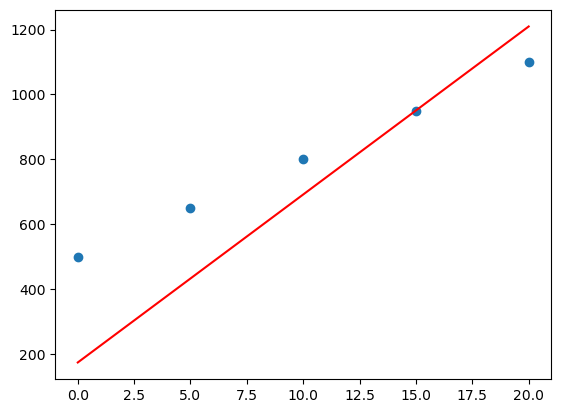

In [36]:
class LinearModelMomentum:
    def __init__(self, m=0, b=0):
        self.m = torch.Tensor([m])
        self.b = torch.Tensor([b])
        self.m.requires_grad = True
        self.b.requires_grad = True
        self.params = [self.m, self.b]
        self.momentum = [torch.zeros_like(param) for param in self.params]
        self.out = None
        self.loss = None
    
    def compute(self, time, speed):
        self.out = self.m * time + self.b
        self.loss = torch.mean((self.out - speed) ** 2)
        self.loss.backward()
    
    def step(self, lr):
        with torch.no_grad():
            self.m -= lr * self.m.grad
            self.b -= lr * self.b.grad
            for momentum, param in zip(self.momentum, self.params):
                momentum *= 0.9
                momentum += param.grad
                param -= lr * momentum
            for param in self.params:
                param.grad.zero_()

n = 5
time = torch.from_numpy(np.linspace(0, 20, n)) # x
# speed = torch.from_numpy(np.linspace(10, 50, n)) # y = 0x^2 + 1x + 5
speed = time * 30 + 500
model = LinearModelMomentum(m=0, b=1)
lr = 1e-3
for i in range(100):
    model.compute(time, speed)
    print(model.loss.data)
    # print("a=", model.a.data, "b=", model.b.data, "c=", model.c.data)
    model.step(lr)
    lr *= 0.99

print("m=", model.m.data, "b=", model.b.data)
plt.plot(time.numpy(), speed.numpy(), 'o')
plt.plot(time.numpy(), model.out.data.numpy(), 'r-')

m= 60.9353141784668 b= 36.99687576293945


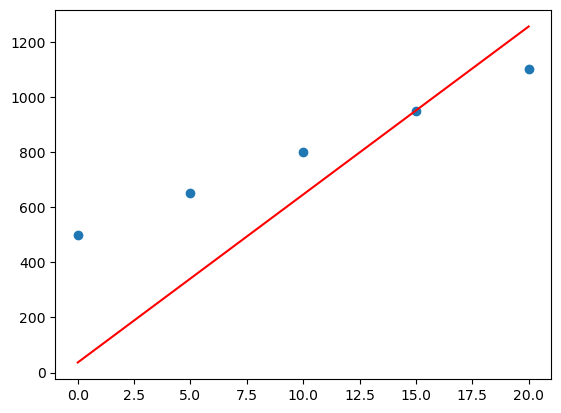

In [46]:
class LinearModelOptim:
    def __init__(self, m=0, b=0):
        self.m = torch.Tensor([m])
        self.b = torch.Tensor([b])
        self.m.requires_grad = True
        self.b.requires_grad = True
        self.params = [self.m, self.b]
        self.momentum = [torch.zeros_like(param) for param in self.params]
        self.out = None
        self.loss = None
    
    def compute(self, time, speed):
        self.out = self.m * time + self.b
        self.loss = torch.mean((self.out - speed) ** 2)
        # self.loss.backward()

    def step(self, optimizer):
        optimizer.zero_grad()
        self.loss.backward()
        optimizer.step()

n = 5
time = torch.from_numpy(np.linspace(0, 20, n)) # x
# speed = torch.from_numpy(np.linspace(10, 50, n)) # y = 0x^2 + 1x + 5
speed = time * 30 + 500
model = LinearModelOptim(m=0, b=1)
lr = 1e-3
optimizer = torch.optim.SGD(model.params, lr=lr)

for i in range(100):
    model.compute(time, speed)
    # print("a=", model.a.data, "b=", model.b.data, "c=", model.c.data)
    model.step(optimizer)
    lr *= 0.99

print("m=", model.m.item(), "b=", model.b.item())
plt.plot(time.numpy(), speed.numpy(), 'o')
plt.plot(time.numpy(), model.out.data.numpy(), 'r-')

m= 57.63408279418945 b= 84.87159729003906


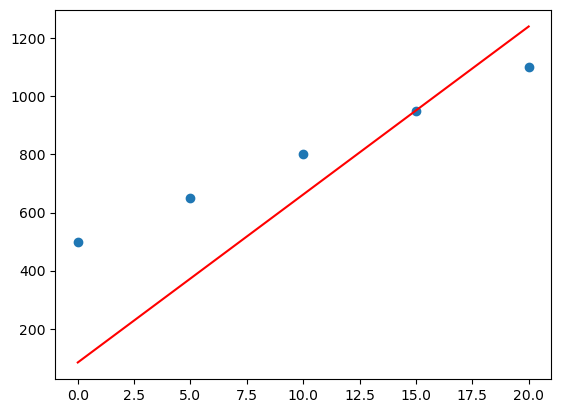

In [61]:
n=5
time = torch.from_numpy(np.linspace(0, 20, n)) # x
# speed = torch.from_numpy(np.linspace(10, 50, n)) # y = 0x^2 + 1x + 5
speed = time * 30 + 500
model = LinearModelOptim(m=1, b=1)
lr = 1e-1
optimizer = torch.optim.RMSprop(model.params, lr=lr, alpha=0.9, momentum=0.9)

for i in range(100):
    model.compute(time, speed)
    # print("a=", model.a.data, "b=", model.b.data, "c=", model.c.data)
    model.step(optimizer)
    lr *= 0.99

print("m=", model.m.item(), "b=", model.b.item())
plt.plot(time.numpy(), speed.numpy(), 'o')
plt.plot(time.numpy(), model.out.data.numpy(), 'r-')

m= 18.38821792602539 b= 19.641626358032227


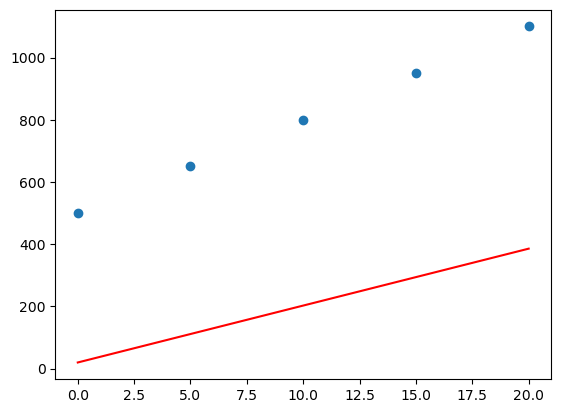

In [82]:
n=5
time = torch.from_numpy(np.linspace(0, 20, n)) # x
# speed = torch.from_numpy(np.linspace(10, 50, n)) # y = 0x^2 + 1x + 5
speed = time * 30 + 500
model = LinearModelOptim(m=1, b=2)
optimizer = torch.optim.Adagrad(model.params, lr=1)

for i in range(100):
    model.compute(time, speed)
    # print("a=", model.a.data, "b=", model.b.data, "c=", model.c.data)
    model.step(optimizer)

print("m=", model.m.item(), "b=", model.b.item())
plt.plot(time.numpy(), speed.numpy(), 'o')
plt.plot(time.numpy(), model.out.data.numpy(), 'r-')